# **IE 7300: Statistical learning for Engineering**



# **Homework 6**

Gauri Damle

2064683093

damle.g@northeastern.edu







Percentage of Effort Contributed by Student :

Signature of Student : Gauri Damle

Submission Date: 25th October 2022

## Importing Modules

In [1]:
#import the required libraries


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import random
from sklearn.utils import shuffle
import statsmodels.api as sm
import itertools
import time
from mpl_toolkits import mplot3d
import numpy as np
from numpy.core.umath_tests import inner1d
from copy import deepcopy





#Preprocessing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Split the training and test dataset
from sklearn.model_selection import train_test_split



### Visualize tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text


### performance matrix
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import plot_confusion_matrix
!pip install scikit-plot
import scikitplot as skplt


import numpy as np
from numpy.core.umath_tests import inner1d
from copy import deepcopy



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  app.launch_new_instance()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [90]:
!jupyter nbconvert --to html /content/drive/MyDrive/SemesterThree/Stats7300/Assignment6/Assignment6.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/SemesterThree/Stats7300/Assignment6/Assignment6.ipynb to html
[NbConvertApp] Writing 1030068 bytes to /content/drive/MyDrive/SemesterThree/Stats7300/Assignment6/Assignment6.html


## Input Data

In [3]:
dfDataset = pd.read_csv('/content/drive/MyDrive/SemesterThree/Stats7300/Assignment6/wine-1.csv')

In [4]:
dfDataset.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
dfDataset.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [6]:
dfDataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
dfDataset.corr()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [9]:
dfDataset.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
dfDataset['Wine'].unique()

array([1, 2, 3])

In [11]:
dfDataset.shape

(178, 14)

## Define features and labels

In [12]:
dfDataset

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
# Data contains 13 feature variables and 1 target variable Wine CLASS
# Define features and labels

In [14]:
y=dfDataset["Wine"].values

In [15]:
dfDataset.loc[:, dfDataset.columns != 'Wine']

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [16]:
x = dfDataset.loc[:, dfDataset.columns != 'Wine'].values


In [17]:
sc =StandardScaler()
x = sc.fit_transform(x)

# **Question**

Create custom classification models using the wine dataset (wine dataset description.txt, Download wine dataset description.txt, wine.csvDownload wine.csv)Download )  and evaluate your model results. Split the dataset into training and test dataset 80:20.

 a) Create a logistics regression, LDA, decision tree, and AdaBoost models. Fit the model using the training dataset and find the model accuracy and confusion matrix. Explain each model's outcome, finding, and accuracy. (10 points) 

 b) Predict the models using the test dataset, and provide the performance metrics. Compare the five models' performance metrics, and explain at least four findings on each of the models. Do not need to repeat the code). (10 points)

 c) Do you see any overfitting and underfitting issues on each model? How to overcome the overfitting/underfitting issues in your custom models? Provide the information model by model. (10 points)

d) List down the important features in each model? How did you choose those important features? Why is it an important feature of the model? Explain with some statistical evidence. (5 points)

Note: Do not use any libraries, and do not copy and paste some content from other blogs or books. Write your own answer.



## Split the dataset into training and test dataset 80:20

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=1234)

In [19]:
Xtrain.shape

(142, 13)

In [20]:
Xtest.shape

(36, 13)

In [21]:
Ytrain.shape

(142,)

In [22]:
Ytest.shape

(36,)

# a) Create a logistics regression, LDA, decision tree, and AdaBoost models. Fit the model using the training dataset and find the model accuracy and confusion matrix. Explain each model's outcome, finding, and accuracy. 

## **1)Logistic Regression**

In [23]:
class MultiClassLogisticRegression:
    """
    Multiclass logistic regression
    """
    
    def __init__(self, epochs = 10000, threshold=1e-3):
        """
        Constructor for multiclass regression

        Args:
            epochs (int, optional): No of iteration Defaults to 10000.
            threshold (_type_, optional): Each iteration thresold. Defaults to 1e-3.
        """
        self.epochs = epochs
        self.threshold = threshold
    
    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        """
        Train the model

        Args:
            X (_type_): Features
            y (_type_): Labels
            batch_size (int, optional): Batch size per iterations. Defaults to 64.
            lr (float, optional): Learning rate. Defaults to 0.001.
            rand_seed (int, optional): _description_. Defaults to 4.
            verbose (bool, optional): _description_. Defaults to False.

        Returns:
            _type_: return the instance 
        """
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.epochs or i < self.epochs):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.threshold: 
                break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_random_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return round(np.mean(self.predict_classes(X) == y),3)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

In [24]:
lrModel = MultiClassLogisticRegression(threshold=1e-5)
lrModel.fit(Xtrain,Ytrain,lr=0.0001)

In [25]:
Ypred_LR = lrModel.predict_classes(Xtrain)

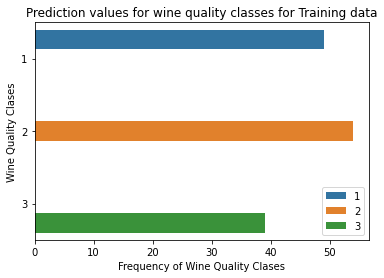

In [26]:
sns.countplot(data=dfDataset, y=Ypred_LR, hue=Ypred_LR)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

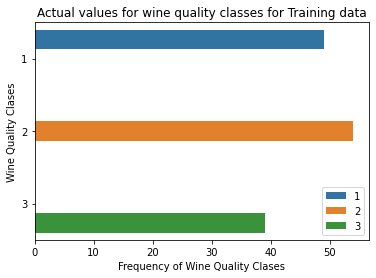

In [27]:
sns.countplot(data=dfDataset, y=Ytrain, hue=Ypred_LR)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Actual values for wine quality classes for Training data")
plt.show()

In [28]:
print("Training Accuracy is ")
accuracy_score(Ytrain,Ypred_LR)

Training Accuracy is 


1.0

In [29]:
df_confusion_matrix = pd.crosstab(Ypred_LR, Ytrain)

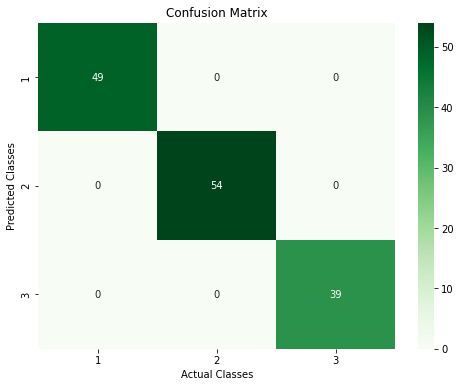

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df_confusion_matrix, annot=True, cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Actual Classes")
plt.ylabel("Predicted Classes")
plt.show()

#### **Insights**
- As per the confusion matrix, the training dataset is closely fit with 100% trianing accuracy.
- The model is 100% fit to training dataset with 142 records.
- As there are 13 feature and their values are scaled it is performing better on uniformly scaled training dataset

##**2)LDA**

In [31]:
class LinearDiscriminantAnalysis:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)


In [32]:
# Project the data onto the 2 primary linear discriminants
ldaModel = LinearDiscriminantAnalysis(2)
ldaModel.fit(Xtrain, Ytrain)
x_projected = ldaModel.transform(Xtrain)

print("Shape of X:", Xtrain.shape)
print("Shape of transformed X:", x_projected.shape)

Shape of X: (142, 13)
Shape of transformed X: (142, 2)


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


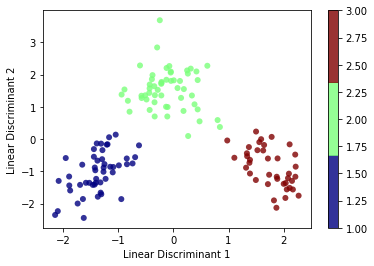

In [33]:
x1, x2 = x_projected[:, 0], x_projected[:, 1]

plt.scatter(
    x1, x2, c=Ytrain, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("jet", 3)
)

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

In [34]:
XLDA = np.real_if_close(x_projected)

In [35]:
x_projected[:, 0].dtype

dtype('complex128')

In [36]:
LRModel_LDA_projected_value = MultiClassLogisticRegression(threshold=1e-5)
LRModel_LDA_projected_value.fit(XLDA,Ytrain,lr=0.0001)

In [37]:
Ypred_LDA = LRModel_LDA_projected_value.predict_classes(x_projected)

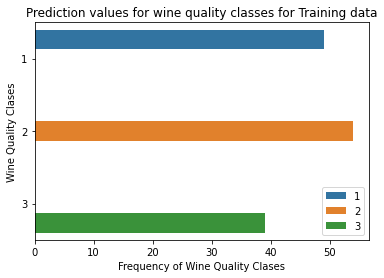

In [38]:
sns.countplot(data=dfDataset, y=Ypred_LDA, hue=Ypred_LDA)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

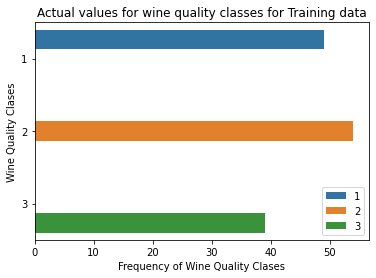

In [39]:
sns.countplot(data=dfDataset, y=Ytrain, hue=Ypred_LDA)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Actual values for wine quality classes for Training data")
plt.show()

In [40]:
print("Training Accuracy is ")
accuracy_score(Ytrain,Ypred_LDA)

Training Accuracy is 


1.0

In [41]:
df_confusion_matrix = pd.crosstab(Ypred_LDA, Ytrain)

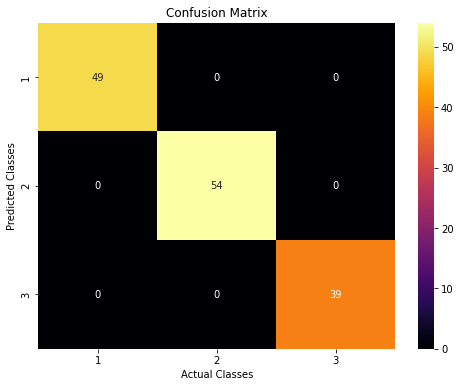

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(df_confusion_matrix, annot=True, cmap='inferno')
plt.title("Confusion Matrix")
plt.xlabel("Actual Classes")
plt.ylabel("Predicted Classes")
plt.show()

#### **Insights**
- As per the confusion matrix, the training dataset is closely fit with 100% trianing accuracy.
- The data with 13 features is projected onto the 2 primary linear discriminants.
- Visualization of these disciminants is showing separation between 3 classes of wine without too much overlap.
- As this projected distriminats are in complex data plane, their real values are extracted and fed to logistic regression to get classification.

## **3)Decision Tree**

In [43]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [44]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=3, max_depth=3):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [45]:
Y = dfDataset["Wine"].values.reshape(-1,1)
X = dfDataset.loc[:, dfDataset.columns != 'Wine'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [46]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_12 <= 750.0 ? 0.2603534610758136
 left:X_6 <= 1.39 ? 0.3278185689885644
  left:X_9 <= 3.4 ? 0.2498512790005949
    left:2.0
    right:3.0
  right:X_0 <= 13.11 ? 0.06947069943289222
    left:2.0
    right:X_0 <= 13.24 ? 0.375
        left:1.0
        right:2.0
 right:X_6 <= 2.14 ? 0.14597627480744368
  left:X_0 <= 12.29 ? 0.4444444444444444
    left:2.0
    right:3.0
  right:X_0 <= 12.99 ? 0.03998334027488548
    left:2.0
    right:1.0


In [47]:
Ypred_decision_tree = classifier.predict(X_train)

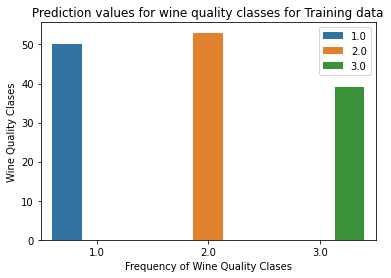

In [48]:
sns.countplot(data=dfDataset, x=Ypred_decision_tree, hue=Ypred_decision_tree)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

In [49]:
## bringing 2 d array into sns accentable format
Y_train1 = Y_train.reshape(142)

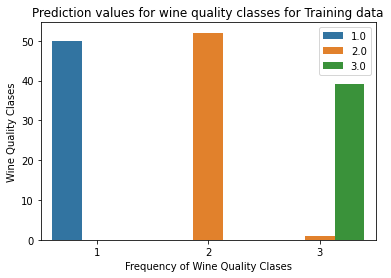

In [50]:
sns.countplot(data=dfDataset, x=Y_train1, hue=Ypred_decision_tree)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

In [51]:
print("Training Accuracy is ")
accuracy_score(Y_train,Ypred_decision_tree)

Training Accuracy is 


0.9929577464788732

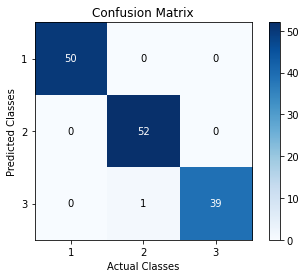

In [52]:
skplt.metrics.plot_confusion_matrix(Y_train, Ypred_decision_tree)
plt.title("Confusion Matrix")
plt.xlabel("Actual Classes")
plt.ylabel("Predicted Classes")
plt.show()

#### **Insights**
- As per the confusion matrix, the training dataset is closely fit with 99.29% trianing accuracy.
- Only one record of wine class 2 is incorrectly classified in the training dataset.
- Also the model is fit with max_depth 3 and min_sample_splits of value 3.
- So the tree is of height 3 with feature 12, 6, 9 and 0 affecting strongly in decision making process.

## **4)AdaBoost**

In [53]:
class AdaBoostClassifier(object):
    '''
    Parameters
    -----------
    base_estimator: object
        The base model from which the boosted ensemble is built.
    n_estimators: integer, optional(default=50)
        The maximum number of estimators
    learning_rate: float, optional(default=1)
    algorithm: {'SAMME','SAMME.R'}, optional(default='SAMME.R')
        SAMME.R uses predicted probabilities to update wights, while SAMME uses class error rate
    random_state: int or None, optional(default=None)
    Attributes
    -------------
    estimators_: list of base estimators
    estimator_weights_: array of floats
        Weights for each base_estimator
    estimator_errors_: array of floats
        Classification error for each estimator in the boosted ensemble.
    Reference:
    1. [multi-adaboost](https://web.stanford.edu/~hastie/Papers/samme.pdf)
    2. [scikit-learn:weight_boosting](https://github.com/scikit-learn/
    scikit-learn/blob/51a765a/sklearn/ensemble/weight_boosting.py#L289)
    '''

    def __init__(self, *args, **kwargs):
        if kwargs and args:
            raise ValueError(
                '''AdaBoostClassifier can only be called with keyword
                   arguments for the following keywords: base_estimator ,n_estimators,
                    learning_rate,algorithm,random_state''')
        allowed_keys = ['base_estimator', 'n_estimators', 'learning_rate', 'algorithm', 'random_state']
        keywords_used = kwargs.keys()
        for keyword in keywords_used:
            if keyword not in allowed_keys:
                raise ValueError(keyword + ":  Wrong keyword used --- check spelling")

        n_estimators = 50
        learning_rate = 1
        algorithm = 'SAMME.R'
        random_state = None

        if kwargs and not args:
            if 'base_estimator' in kwargs:
                base_estimator = kwargs.pop('base_estimator')
            else:
                raise ValueError('''base_estimator can not be None''')
            if 'n_estimators' in kwargs: n_estimators = kwargs.pop('n_estimators')
            if 'learning_rate' in kwargs: learning_rate = kwargs.pop('learning_rate')
            if 'algorithm' in kwargs: algorithm = kwargs.pop('algorithm')
            if 'random_state' in kwargs: random_state = kwargs.pop('random_state')

        self.base_estimator_ = base_estimator
        self.n_estimators_ = n_estimators
        self.learning_rate_ = learning_rate
        self.algorithm_ = algorithm
        self.random_state_ = random_state
        self.estimators_ = list()
        self.estimator_weights_ = np.zeros(self.n_estimators_)
        self.estimator_errors_ = np.ones(self.n_estimators_)


    def _samme_proba(self, estimator, n_classes, X):
        """Calculate algorithm 4, step 2, equation c) of Zhu et al [1].
        References
        ----------
        .. [1] J. Zhu, H. Zou, S. Rosset, T. Hastie, "Multi-class AdaBoost", 2009.
        """
        proba = estimator.predict_proba(X)

        # Displace zero probabilities so the log is defined.
        # Also fix negative elements which may occur with
        # negative sample weights.
        proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
        log_proba = np.log(proba)

        return (n_classes - 1) * (log_proba - (1. / n_classes)
                                  * log_proba.sum(axis=1)[:, np.newaxis])


    def fit(self, X, y):
        self.n_samples = X.shape[0]
        # There is hidden trouble for classes, here the classes will be sorted.
        # So in boost we have to ensure that the predict results have the same classes sort
        self.classes_ = np.array(sorted(list(set(y))))
        self.n_classes_ = len(self.classes_)
        for iboost in range(self.n_estimators_):
            if iboost == 0:
                sample_weight = np.ones(self.n_samples) / self.n_samples

            sample_weight, estimator_weight, estimator_error = self.boost(X, y, sample_weight)

            # early stop
            if estimator_error == None:
                break

            # append error and weight
            self.estimator_errors_[iboost] = estimator_error
            self.estimator_weights_[iboost] = estimator_weight

            if estimator_error <= 0:
                break

        return self


    def boost(self, X, y, sample_weight):
        if self.algorithm_ == 'SAMME':
            return self.discrete_boost(X, y, sample_weight)
        elif self.algorithm_ == 'SAMME.R':
            return self.real_boost(X, y, sample_weight)

    def real_boost(self, X, y, sample_weight):
        estimator = deepcopy(self.base_estimator_)
        if self.random_state_:
            estimator.set_params(random_state=1)

        estimator.fit(X, y, sample_weight=sample_weight)

        y_pred = estimator.predict(X)
        incorrect = y_pred != y
        estimator_error = np.dot(incorrect, sample_weight) / np.sum(sample_weight, axis=0)

        # if worse than random guess, stop boosting
        if estimator_error >= 1.0 - 1 / self.n_classes_:
            return None, None, None

        y_predict_proba = estimator.predict_proba(X)
        # repalce zero
        y_predict_proba[y_predict_proba < np.finfo(y_predict_proba.dtype).eps] = np.finfo(y_predict_proba.dtype).eps

        y_codes = np.array([-1. / (self.n_classes_ - 1), 1.])
        y_coding = y_codes.take(self.classes_ == y[:, np.newaxis])

        # for sample weight update
        intermediate_variable = (-1. * self.learning_rate_ * (((self.n_classes_ - 1) / self.n_classes_) *
                                                              inner1d(y_coding, np.log(
                                                                  y_predict_proba))))  #dot iterate for each row

        # update sample weight
        sample_weight *= np.exp(intermediate_variable)

        sample_weight_sum = np.sum(sample_weight, axis=0)
        if sample_weight_sum <= 0:
            return None, None, None

        # normalize sample weight
        sample_weight /= sample_weight_sum

        # append the estimator
        self.estimators_.append(estimator)

        return sample_weight, 1, estimator_error


    def discrete_boost(self, X, y, sample_weight):
        estimator = deepcopy(self.base_estimator_)
        if self.random_state_:
            estimator.set_params(random_state=1)

        estimator.fit(X, y, sample_weight=sample_weight)

        y_pred = estimator.predict(X)
        incorrect = y_pred != y
        estimator_error = np.dot(incorrect, sample_weight) / np.sum(sample_weight, axis=0)

        # if worse than random guess, stop boosting
        if estimator_error >= 1 - 1 / self.n_classes_:
            return None, None, None

        # update estimator_weight
        estimator_weight = self.learning_rate_ * np.log((1 - estimator_error) / estimator_error) + np.log(
            self.n_classes_ - 1)

        if estimator_weight <= 0:
            return None, None, None

        # update sample weight
        sample_weight *= np.exp(estimator_weight * incorrect)

        sample_weight_sum = np.sum(sample_weight, axis=0)
        if sample_weight_sum <= 0:
            return None, None, None

        # normalize sample weight
        sample_weight /= sample_weight_sum

        # append the estimator
        self.estimators_.append(estimator)

        return sample_weight, estimator_weight, estimator_error

    def predict(self, X):
        n_classes = self.n_classes_
        classes = self.classes_[:, np.newaxis]
        pred = None

        if self.algorithm_ == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            pred = sum(self._samme_proba(estimator, n_classes, X) for estimator in self.estimators_)
        else:  # self.algorithm == "SAMME"
            pred = sum((estimator.predict(X) == classes).T * w
                       for estimator, w in zip(self.estimators_,
                                               self.estimator_weights_))

        pred /= self.estimator_weights_.sum()
        if n_classes == 2:
            pred[:, 0] *= -1
            pred = pred.sum(axis=1)
            return self.classes_.take(pred > 0, axis=0)

        return self.classes_.take(np.argmax(pred, axis=1), axis=0)


    def predict_proba(self, X):
        if self.algorithm_ == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            proba = sum(self._samme_proba(estimator, self.n_classes_, X)
                        for estimator in self.estimators_)
        else:  # self.algorithm == "SAMME"
            proba = sum(estimator.predict_proba(X) * w
                        for estimator, w in zip(self.estimators_,
                                                self.estimator_weights_))

        proba /= self.estimator_weights_.sum()
        proba = np.exp((1. / (n_classes - 1)) * proba)
        normalizer = proba.sum(axis=1)[:, np.newaxis]
        normalizer[normalizer == 0.0] = 1.0
        proba /= normalizer

        return proba

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf_BASE_LEARNER = DecisionTreeClassifier(random_state=0)
clf = AdaBoostClassifier(base_estimator = clf_BASE_LEARNER, n_estimators=500)
clf.fit(Xtrain,Ytrain)

In [55]:
Y_PRED_TRAIN = clf.predict(Xtrain)

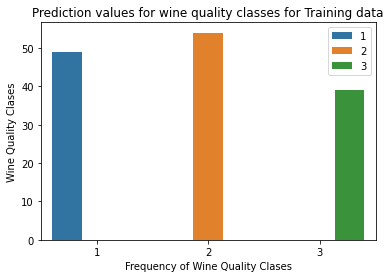

In [56]:
sns.countplot(data=dfDataset, x=Y_PRED_TRAIN, hue=Y_PRED_TRAIN)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

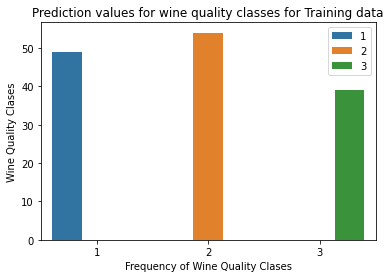

In [57]:
sns.countplot(data=dfDataset, x=Ytrain, hue=Y_PRED_TRAIN)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

In [58]:
print("Training Accuracy is ")
accuracy_score(Ytrain,Y_PRED_TRAIN)

Training Accuracy is 


1.0

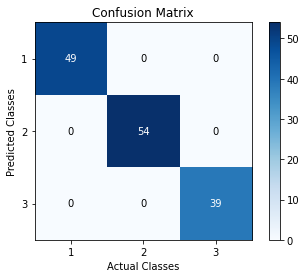

In [59]:
skplt.metrics.plot_confusion_matrix(Ytrain, Y_PRED_TRAIN)
plt.title("Confusion Matrix")
plt.xlabel("Actual Classes")
plt.ylabel("Predicted Classes")
plt.show()

#### **Insights**
- As per the confusion matrix, the training dataset is closely fit with 100% trianing accuracy.
- Also the model is fit with Base Learner from sklearn library.
- As the Adaboost consideres the weak learners and improves its performance, thus the model is performing better than decision tree.

# b) Predict the models using the test dataset, and provide the performance metrics. Compare the five models' performance metrics, and explain at least four findings on each of the models. Do not need to repeat the code). (10 points)

## **1)Logistic Regression**

In [60]:
Ypred_LR_test_data = lrModel.predict_classes(Xtest)

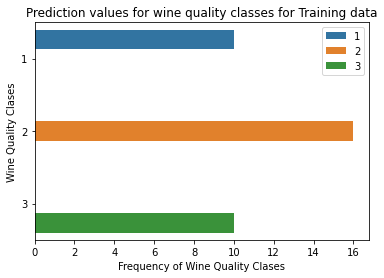

In [61]:
sns.countplot(data=dfDataset, y=Ypred_LR_test_data, hue=Ypred_LR_test_data)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

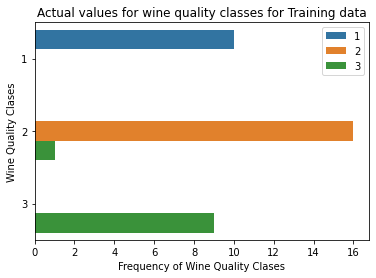

In [62]:
sns.countplot(data=dfDataset, y=Ytest, hue=Ypred_LR_test_data)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Actual values for wine quality classes for Training data")
plt.show()

In [63]:
print("Test Accuracy is ")
accuracy_score(Ytest,Ypred_LR_test_data)

Test Accuracy is 


0.9722222222222222

In [64]:
df_confusion_matrix = pd.crosstab(Ypred_LR_test_data, Ytest)

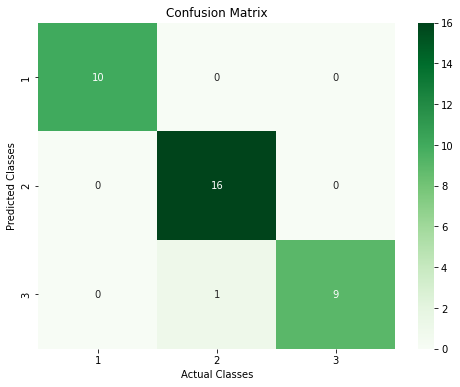

In [65]:
plt.figure(figsize=(8,6))
sns.heatmap(df_confusion_matrix, annot=True, cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Actual Classes")
plt.ylabel("Predicted Classes")
plt.show()

**Findings**

- Overall we can see that tesing/prediction accuracy is less than training accuracy.

- This is Overfitting, where model is very closely fit with training dataset.

- Wine class 2 is predicted as 3 for one record as seen in the output plots for test dataset. This is observed due to fact that dataset is slightly biased for class 2. The Wine class quality is 2 for most records as compared with classes 1 and 3. 

- The accuracy of Logistic Regression:


    Train dataset:  100 %
    Test dataset:  97.2 %




##**2)LDA**

In [66]:
x_projected_test = ldaModel.transform(Xtest)

print("Shape of X:", Xtest.shape)
print("Shape of transformed X:", x_projected_test.shape)

Shape of X: (36, 13)
Shape of transformed X: (36, 2)


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


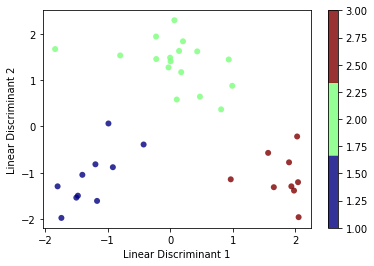

In [67]:
x1, x2 = x_projected_test[:, 0], x_projected_test[:, 1]

plt.scatter(
    x1, x2, c=Ytest, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("jet", 3)
)

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

In [68]:
XLDA_test = np.real_if_close(x_projected_test)

In [69]:
x_projected_test[:, 0].dtype

dtype('complex128')

In [70]:
Ypred_LDA_test = LRModel_LDA_projected_value.predict_classes(XLDA_test)

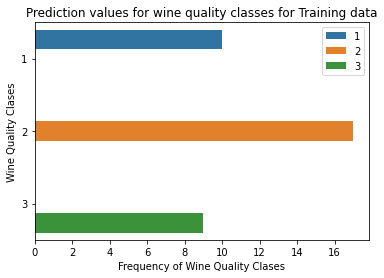

In [71]:
sns.countplot(data=dfDataset, y=Ypred_LDA_test, hue=Ypred_LDA_test)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

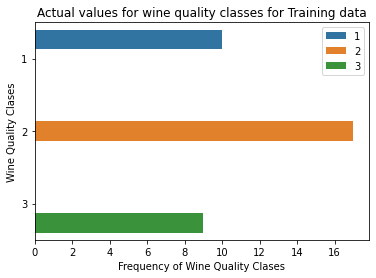

In [72]:
sns.countplot(data=dfDataset, y=Ytest, hue=Ypred_LDA_test)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Actual values for wine quality classes for Training data")
plt.show()

In [73]:
print("Training Accuracy is ")
accuracy_score(Ytest,Ypred_LDA_test)

Training Accuracy is 


1.0

In [74]:
df_confusion_matrix = pd.crosstab(Ytest, Ypred_LDA_test)

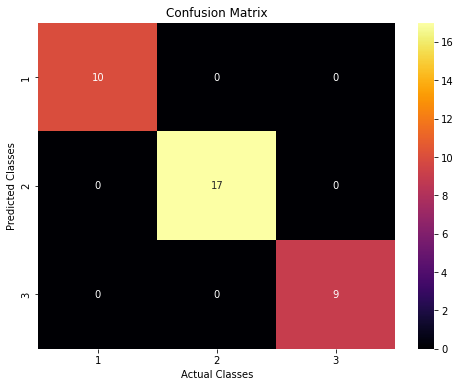

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(df_confusion_matrix, annot=True, cmap='inferno')
plt.title("Confusion Matrix")
plt.xlabel("Actual Classes")
plt.ylabel("Predicted Classes")
plt.show()

#### **Insights**
- As per the confusion matrix, the test dataset is classifiying all records correctly. 
- The accuracy of Logistic Regression:


    Train dataset:  100 %
    Test dataset:  100 %

- LDA is projecting 13 input features into 2 dimentional space causing improved classification.
- The projected values from the LDA are fed to logistic regression classifier to test its accuracy and meature performance.
- As per LDA plot the values of wine quality classes 1,2 and 3 are separated clusters without any overlap.
- These projected values can be used in Logistic regression to imporove its accuracy further.


## **3)Decision Tree**

In [76]:
Y_pred_decision_tree_test_data = classifier.predict(X_test) 


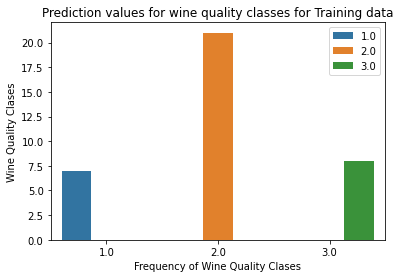

In [77]:
sns.countplot(data=dfDataset, x=Y_pred_decision_tree_test_data, hue=Y_pred_decision_tree_test_data)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

In [78]:
## bringing 2 d array into sns accentable format
Y_test1 = Y_test.reshape(36)

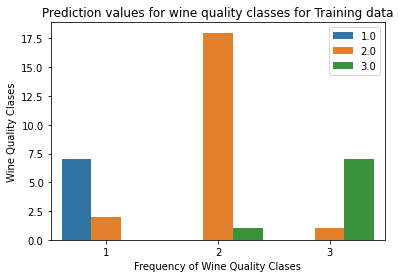

In [79]:
sns.countplot(data=dfDataset, x=Y_test1, hue=Y_pred_decision_tree_test_data)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

In [80]:
print("Test Accuracy is ")
accuracy_score(Y_test,Y_pred_decision_tree_test_data)

Test Accuracy is 


0.8888888888888888

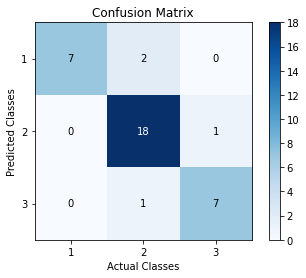

In [81]:
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred_decision_tree_test_data)
plt.title("Confusion Matrix")
plt.xlabel("Actual Classes")
plt.ylabel("Predicted Classes")
plt.show()

#### **Insights**
- As per the confusion matrix, the testing dataset is with 88% accuracy.
- Total 4 records are incorrectly classified in the test dataset as compared to only 1 misclassified record in training.

- The accuracy of Decision Tree:


1. Train dataset:  99.29 %
2. Test dataset:  88 %


- The model is overfit model as test accuracy is dropped.


## **4)AdaBoost**

In [82]:
Y_PRED_TEST = clf.predict(Xtest)

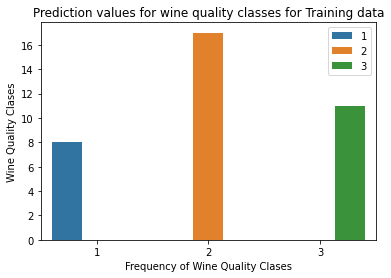

In [83]:
sns.countplot(data=dfDataset, x=Y_PRED_TEST, hue=Y_PRED_TEST)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

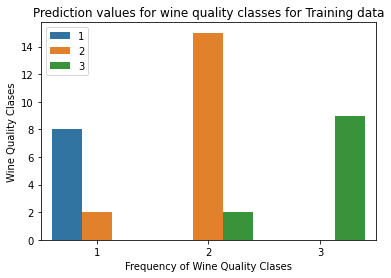

In [84]:
sns.countplot(data=dfDataset, x=Ytest, hue=Y_PRED_TEST)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

In [85]:
print("Training Accuracy is ")
accuracy_score(Ytest,Y_PRED_TEST)

Training Accuracy is 


0.8888888888888888

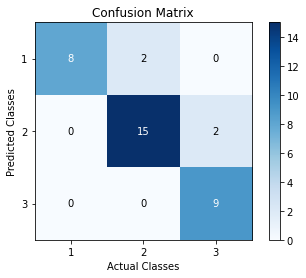

In [86]:
skplt.metrics.plot_confusion_matrix(Ytest, Y_PRED_TEST)
plt.title("Confusion Matrix")
plt.xlabel("Actual Classes")
plt.ylabel("Predicted Classes")
plt.show()

#### **Insights**
- As per the confusion matrix, the test dataset is giving better accuracy of 88% dropping from the closely fit training data with 100% accuracy. 
- This model is overfit model as data is closed fit with training, generalization with test dataset is not good.
- This can be checked with tuning hyper parameters like number of estimaters.
- The model is fit with Base Learner from sklearn library, we can use custom base learner as well.
- Overall as the Adaboost consideres the weak learners and improves its performance, thus the model is performing better than decision tree.



1.   Training accuracy 100%
2.   Test data accuracy 88%



# c) Do you see any overfitting and underfitting issues on each model? How to overcome the overfitting/underfitting issues in your custom models? Provide the information model by model. (10 points)

## Logistic Regression and LDA

- In case of Logistic regression the model overall accuracy when encountered with unseen data is found with test dataset which is 97.2.
- The prediction accuracy is little less and model is closely fit to training data.
- This is overfit model. To over come this issue in custom model the hyper parameter - epochs can be increased.
- To reduce overfitting issue, the input dataset records can be increased than 142 rows in training data.

- For LDA model, projected features X0 and X1 are improving prediction accuracy further giving generalised model.
- Prediction accuracy of LDA discrimnants is 100% same as training.
- LDA is not overfit model and it is production ready. 

## Decision Tree and Adaboost


- The Decision Tree model is over fit model with prediction accuracy lesser than training accuracy.
- To avoid the overfitting in case of custom decision tree model we can reduce max depth parameter of decision tree.
- This will reduce the training accuracy from 100% but at the cost of improving prediction accuracy better than 88%
- Similar is the case with Adaboost Model, the issue of overfitting.
- Training accuracy is 100% and testing data accuracy is 88%.
- To improve overfitting in custom model we can tune parameters like n_estimators and learning rate. 
      


# d) List down the important features in each model? How did you choose those important features? Why is it an important feature of the model? Explain with some statistical evidence. (5 points)

## Logistic Regression

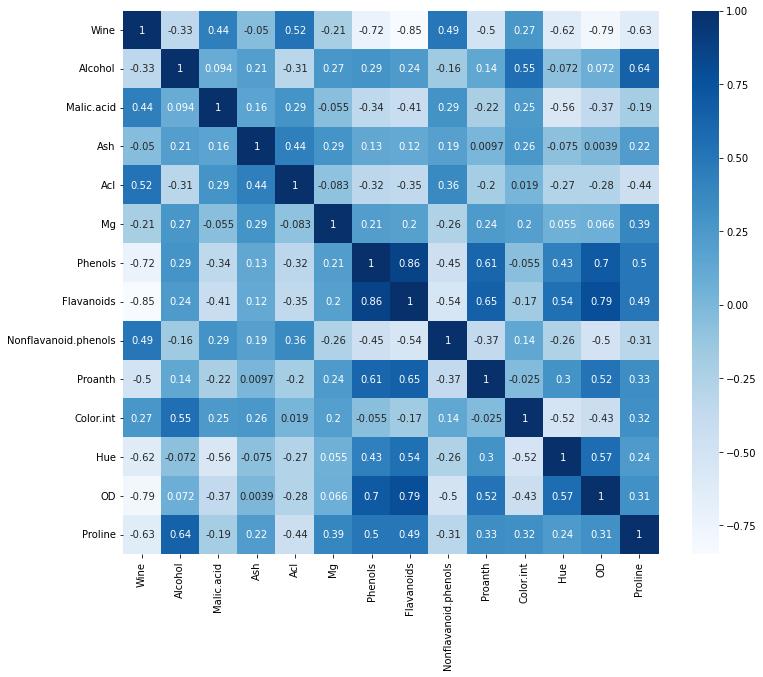

In [88]:
plt.figure(figsize=(12,10))
sns.heatmap(dfDataset.corr(), annot=True, cmap='Blues')
plt.show()

From the correlation plots we can see how features are impacting target variable.

Lets take a look at the first row i.e wine quality classes, to see how wine class is correlated with other features.

ACL is the highly correlated with wine quality followed by Non flavanoid phenols, Malic acid and colour.int.

Rest all features are negatively affecting wine colour. In that Flavanoid is strongest impacing factor in wine classes, followed by OD and phenols.



- ACL
- Non flavanoid phenols
- Malic acid 
- colour.int.

Negatively affecting :-

- Flavanoid
- OD
- phenols

In case of our custom model we have used scaled dataset.
This will help in assigning weights to Logistic regression model equally without bias in the model.


## LDA

- In LDA the 13 input features are projected onto 2 Linear disciminants. 
- These two features are calculated using mean and variance of clusters thus they are along the axis of maximum separation between cluster datapoints.
- Thus these transformed components are most important features affecting stringly the Target wine class.

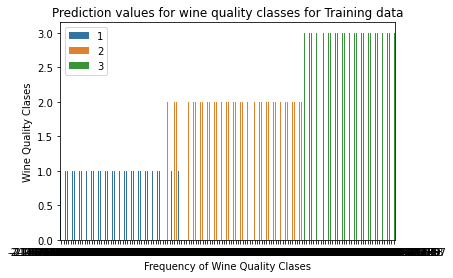

In [87]:
sns.barplot(data=dfDataset,x=XLDA[:,0], y=Ypred_LDA, hue=Ypred_LDA)
plt.xlabel("Frequency of Wine Quality Clases")
plt.ylabel("Wine Quality Clases")
plt.title("Prediction values for wine quality classes for Training data")
plt.show()

As per above mentioned statistical distribusion plot we can see that feature XLDA 0 is correctly separating 3 different types of classes.

Thus these projected values are better classifiers and improve accuracy as well.

## Decion Tree

- Important features for Decision tree are 


X_12 = Proline\
X_6 = Flavanoids\
X_9 = Color.int\
X_0  = Alcohol




These features are selected as their entropy values are lesser so they are high up the hierarchy in decision tree.

Statistical evidence of this for Decision tree model comes from printed decision tree shown above, the information gain value is maximum at root and reduces top down as we move to leaf nodes.

## Adaboost

In case of Adaboost, it sequencially combines the weak learners and produces the improved output than single decision tree classifier.

The features are ranked based on entropy value and less entropy features are selected as startting stumps of weak learners base.

The performace gain for each learner is canculated and sample weight is assigned. After calculating normalized weight these weights are updated for incorrectly classified records whcih are then fed to next stump.

Adaboost doesn't choose features with more entropy who are strongly affecting target like classification with decision tree. Here weak entropy features are the onces who are considered as Stumps.